### KNN On Credit Card Fraud Detection:
We have to implement KNN on Credit Card.If we removes the outliers factor we can get more efiicients results.So remove the outliers from dataset


#### Information about Credit Card Fraud Detection:

- The datasets contains transactions made by credit cards in September 2013 by european cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
- It contains only numerical input variables which are the result of a PCA transformation.
- Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.



#### Features Information:

 - (i). Amount: is the transaction Amount
 - (ii). Time : contains the seconds elapsed between each transaction and the first transaction in the dataset.
 - (iii).V1,V2,....V28: are the principal components obtained with PCA.
 - (IV). Class: fraud =1,otherwise =0



**Link:** https://www.kaggle.com/mlg-ulb/creditcardfraud


In [3]:
# import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# load the Credit Card Fraud Detection dataset
# recap the the dataset

credit = pd.read_csv('creditcard.csv')
credit.head() # show the 5 datapoints of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# change column Class to Fraud
credit = credit.rename(columns= {'Class':'Fraud'})
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# assign the fraud_data and non_fraud_data category
fraud_data = credit[credit['Fraud']== 1]
non_fraud_data = credit[credit['Fraud'] == 0]

In [21]:
# for accesing of desired column's statistics we have created the  statistics function

def statistics(column_name):
    fraud_stats = fraud_data[column_name].describe()
    non_fraud_stats = non_fraud_data[column_name].describe()
    df = pd.DataFrame(data={'Non_Fraud':non_fraud_stats, 'Fraud':fraud_stats})
    return df

In [6]:
# split the  features and lables
X = credit.iloc[:,:-1] 
y = credit.iloc[:,-1]


In [7]:
# Dataset is very large,so we should standardize the data
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# IMPORT the PCA scikit-learn library
from sklearn.decomposition import PCA
pca = PCA() # pca() function
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
from sklearn.neighbors import LocalOutlierFactor

### Local outlier detection

In [10]:
%%time

lof = LocalOutlierFactor(n_jobs=-1) # n_jobs = -1 means that use all cores of cpu
lof.fit(X_scaled)

Wall time: 47min 41s


(0, 0.1)

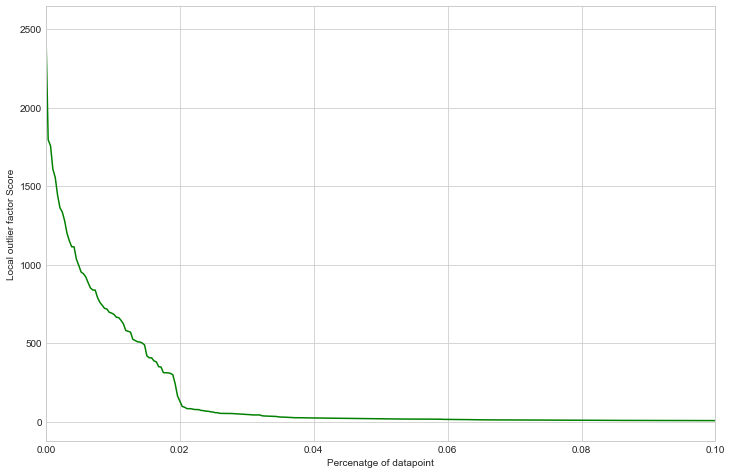

In [11]:
lof_score = -np.sort(lof.negative_outlier_factor_) # """" negative_outlier_factor_:  The opposite LOF of the training samples. The lower, the more abnormal. Inliers tend to have a LOF score close to 1, while outliers tend to have a larger LOF score.""""

plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0, 100, len(lof_score)), lof_score,color  ='green')
plt.ylabel('Local outlier factor Score')
plt.xlabel('Percenatge of datapoint')
plt.xlim((0, 0.1))

# Local Outlier Factor  score of each datapoint sorted in descending order
# negative sign means that convert neagtive to positive

#### Observation:
- LOF start at 0.02 % of datapoits and we are getting elbow shape at 0.02%
- choose contamination = 0.02%



In [12]:
%%time 

lof.contamination = 0.02 / 100
inliers = lof.fit_predict(X_scaled)

Wall time: 57min 16s


In [13]:
# count the total numbers of outliers

(inliers == -1).sum()

57

In [14]:
# here we have Removed the  outliers
X_cleaned_scaled = X_scaled[inliers == 1]
y_cleaned = y[inliers == 1]

In [16]:
y_cleaned.head() #y_cleaned outliers

0    0
1    0
2    0
3    0
4    0
Name: Fraud, dtype: int64

In [15]:
X_cleaned_scaled #x_ceaned_sclaed outliers

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

### KNN on Credit Card fraud detection

#### Subtask 1. Propose a suitable error metrics for this problem. 
Our dataset is classifiaction or we can say it is is binary classification.Where transaction is fraud or non_fraud.
Distinguish between fraud and non_fraud tranasction recall_score metric would be good measure.recall_score work on true and false value.

**recall_score:** Compute the recall

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

** classification_report:** Build a text report showing the main classification metrics

In [17]:
# import the required library

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_scaled, y_cleaned, test_size=0.80, random_state=100)

In [19]:
%%time
clf = KNeighborsClassifier(n_jobs=-1) # n_jobs = -1 mean utilize all the cores of processors
clf.fit(X_train, y_train) # fit the x_train and y_train
pred = clf.predict(X_test) # predict the K Neighbors classifiers

Wall time: 8min 32s


In [28]:
print("Classification report:\n")
print(classification_report(y_test, pred, target_names=['Non_Fraud', 'Fraud']))

Classification report:

             precision    recall  f1-score   support

  Non_Fraud       1.00      1.00      1.00    227420
      Fraud       0.88      0.73      0.79       380

avg / total       1.00      1.00      1.00    227800



#### Observation:
- We achieved 0.73 recall_ score  for fraud tranasctions



#### Subtask  2. Apply KNN on the dataset, find out the best k using grid search.

In [32]:

nos_neighbors = [1,2,3,4,5,6,7,8,9,10,12,15,17,18,20,25,30,35,40] #initialized list of numbers of neighbors

# while apply knn calculate the mean and standard deviations for every k -NN
means = [] 
deviations = []
for k in nos_neighbors:
    clf = Pipeline([
        ('norm', Normalizer()),
        ('knn', KNeighborsClassifier(n_neighbors=k, n_jobs=-1))
    ])
    
    scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=10)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    means.append(mean_score)
    deviations.append(std_score)
    
    print(f'k={k:2} Recall= {mean_score*100:4.4f}%   ±{std_score*100:4.4f}%')


k= 1 Recall= 73.3333%   ±11.3424%
k= 2 Recall= 66.9697%   ±11.7128%
k= 3 Recall= 74.1667%   ±11.3609%
k= 4 Recall= 69.6970%   ±12.3650%
k= 5 Recall= 73.3333%   ±13.9559%
k= 6 Recall= 71.5152%   ±12.6730%
k= 7 Recall= 75.9091%   ±10.5941%
k= 8 Recall= 73.1818%   ±12.7858%
k= 9 Recall= 77.6515%   ±9.3108%
k=10 Recall= 77.6515%   ±9.3108%
k=12 Recall= 78.5606%   ±10.8735%
k=15 Recall= 78.5606%   ±10.8735%
k=17 Recall= 78.5606%   ±10.8735%
k=18 Recall= 78.5606%   ±10.8735%
k=20 Recall= 78.5606%   ±10.8735%
k=25 Recall= 78.5606%   ±10.8735%
k=30 Recall= 78.5606%   ±10.8735%
k=35 Recall= 78.5606%   ±10.8735%
k=40 Recall= 78.5606%   ±10.8735%


#### Observation:
- Here we got the accuracy of 78.56% at k =12
- We are also getting same accuracy at k =15,17,18....40


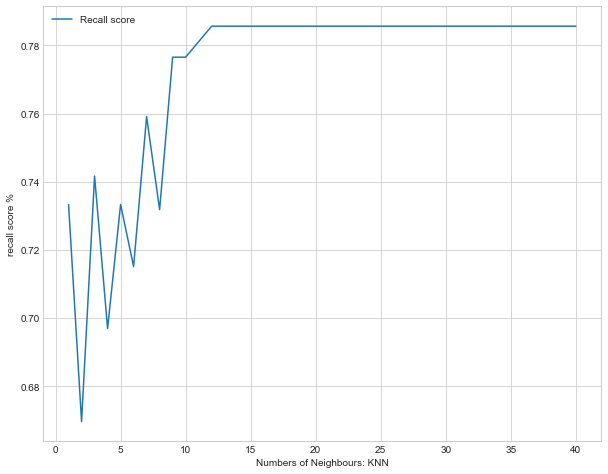

In [48]:
# plot grid for every k
means = np.array(means) 
deviations = np.array(deviations)
nos_neighbors = np.array(nos_neighbors)



plt.figure(figsize=(10, 8))
plt.plot(nos_neighbors, means, label='Recall score')
plt.xlabel("Numbers of Neighbours: KNN")
plt.ylabel("recall score %")
plt.legend();


#### Observation:
- We get accuarcy of 78.56%  at k = 12
- As k is increasing there is no changing in accuracy